[*********************100%***********************]  1 of 1 completed
C:\Users\VINAYAK\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.1324 - mae: 0.2743 - val_loss: 0.0036 - val_mae: 0.0497
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0039 - mae: 0.0496 - val_loss: 0.0033 - val_mae: 0.0486
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0022 - mae: 0.0375 - val_loss: 0.0027 - val_mae: 0.0443
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0020 - mae: 0.0354 - val_loss: 0.0027 - val_mae: 0.0447
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0018 - mae: 0.0335 - val_loss: 0.0026 - val_mae: 0.0438
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0017 - mae: 0.0318 - val_loss: 0.0027 - val_mae: 0.0445
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0017 - mae: 0.0326 - val_loss: 0.0027 - val_mae: 0.0440
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0016 - mae: 0.0313 - val_loss: 0.0027 - val_mae: 0.0443
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.001

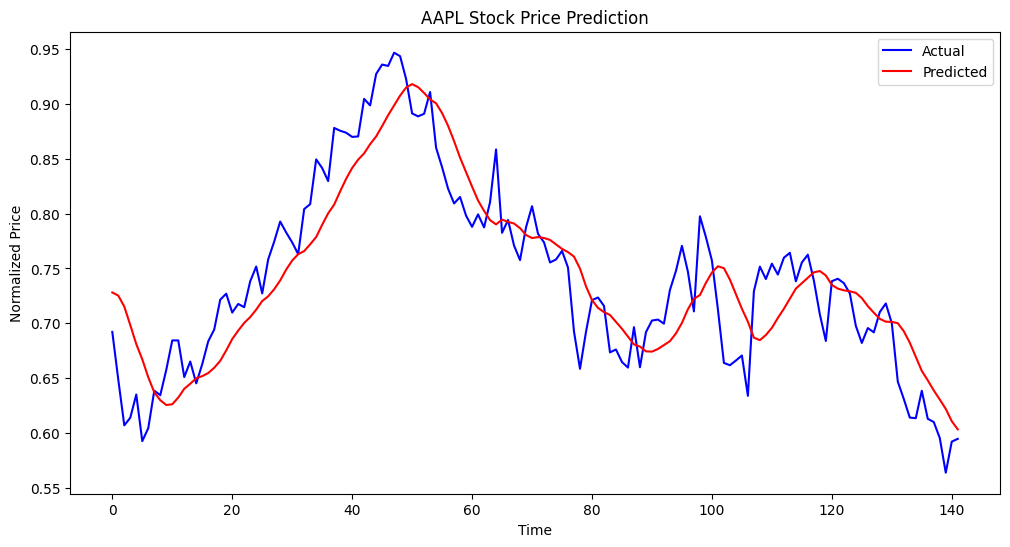

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical stock data using yfinance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Define parameters
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-01-01"

# Fetch data
close_prices = fetch_stock_data(ticker, start_date, end_date)
data = close_prices.values

# Normalize the data to the range [0, 1]
data = (data - np.min(data)) / (np.max(data) - np.min(data))

# Prepare the sequence data
sequence_length = 50
x_data = []
y_data = []
for i in range(len(data) - sequence_length):
    x_data.append(data[i:i+sequence_length])
    y_data.append(data[i+sequence_length])

x_data = np.array(x_data)
y_data = np.array(y_data)

# Reshape data to fit LSTM input format (samples, time steps, features)
x_data = x_data.reshape((x_data.shape[0], x_data.shape[1], 1))

# Split into training and testing sets
train_size = int(len(x_data) * 0.8)
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(sequence_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='mse', 
              metrics=['mae'])

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=16, validation_data=(x_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Mean Absolute Error (MAE): {mae}")

# Make predictions
predictions = model.predict(x_test)
print("Predictions:", predictions[:5].flatten())
print("Actual:", y_test[:5])

# Example usage
example_input = x_test[0].reshape((1, sequence_length, 1))
example_prediction = model.predict(example_input)
print("Example Input (first sequence from test set):", x_test[0].flatten())
print("Predicted Next Value:", example_prediction.flatten()[0])

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Actual", color="blue")
plt.plot(range(len(predictions)), predictions.flatten(), label="Predicted", color="red")
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()
